## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../")

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")

## 2. Import Data

In [4]:
original = pd.read_csv("../Data/copia_de_prueba.csv")

In [5]:
df = original.copy()

In [6]:
df.head()

,Unnamed: 0,Airport_hub,Intercity_train_connectivity,Gun_related_deaths,Guns_per_residents,Pisa_ranking,Best_university,Monthly_Fitness_Club_Membership,Beer,Monthly_Public_Transport,...,Art_galleries,Concert_venues,Museums,Sport_venues,Currency_for_urban_area,GDP_per_capita_uno,Growth,Unemployment,url,Average_Annual_percent_sunshine
0,0,8,0.59,1,12,13,Aarhus University,37.0,1.70,62.0,...,51,95,18,21,DKK,44342.66,5%,4%,https://teleport.org/cities/aarhus/,0.0
1,1,26,0.17,1,24,16,University of Adelaide,50.0,4.30,80.0,...,82,89,37,91,AUD,46433.30,7%,6%,https://teleport.org/cities/adelaide/,12.6
2,2,23,0.11,16,328,24,University of New Mexico,52.0,2.90,37.0,...,127,99,35,10,USD,54596.65,7%,5%,https://teleport.org/cities/albuquerque/,168.0
3,3,45,0.66,1,1,39,427.97,83.0,0.68,19.0,...,61,68,24,53,KZT,24019.95,9%,6%,https://teleport.org/cities/almaty/,64.0
4,4,237,0.68,1,4,10,University of Amsterdam,49.0,2.10,100.0,...,284,339,187,154,EUR,47354.53,3%,6%,https://teleport.org/cities/amsterdam/,12.9


In [7]:
df.drop(['Unnamed: 0','Best_university','Description','LGBT_adoption_rights','LGBT_homosexuality_rights','LGBT_marriage_rights','Currency_for_urban_area','Growth','Unemployment','url'], axis=1, inplace=True)

In [8]:
df.head()

,Airport_hub,Intercity_train_connectivity,Gun_related_deaths,Guns_per_residents,Pisa_ranking,Monthly_Fitness_Club_Membership,Beer,Monthly_Public_Transport,Lunch,Large_apartment,...,cities,Poblacion,Homosexuality_acceptance,VAT_Sales_Tax,Art_galleries,Concert_venues,Museums,Sport_venues,GDP_per_capita_uno,Average_Annual_percent_sunshine
0,8,0.59,1,12,13,37.0,1.70,62.0,15.0,1700,...,Aarhus,250200,93.03,0.25,51,95,18,21,44342.66,0.0
1,26,0.17,1,24,16,50.0,4.30,80.0,13.0,1500,...,Adelaide,1708700,0.79,0.10,82,89,37,91,46433.30,12.6
2,23,0.11,16,328,24,52.0,2.90,37.0,12.0,1200,...,Albuquerque,630800,93.13,0.07,127,99,35,10,54596.65,168.0
3,45,0.66,1,1,39,83.0,0.68,19.0,5.7,620,...,Almaty,2029800,66.56,0.12,61,68,24,53,24019.95,64.0
4,237,0.68,1,4,10,49.0,2.10,100.0,18.0,2400,...,Amsterdam,2628100,97.37,0.21,284,339,187,154,47354.53,12.9


In [43]:
df.columns

Index(['Airport_hub', 'Intercity_train_connectivity', 'Gun_related_deaths',
       'Guns_per_residents', 'Pisa_ranking', 'Monthly_Fitness_Club_Membership',
       'Beer', 'Monthly_Public_Transport', 'Lunch', 'Large_apartment',
       'Medium_apartment', 'Small_apartment', 'cities', 'Poblacion',
       'Homosexuality_acceptance', 'VAT_Sales_Tax', 'Art_galleries',
       'Concert_venues', 'Museums', 'Sport_venues', 'GDP_per_capita_uno',
       'Average_Annual_percent_sunshine', 'predict'],
      dtype='object')

In [ ]:
#sns.pairplot(df, hue="cities")

In [10]:
pca = PCA(2)

In [11]:
df2 = pd.DataFrame(pca.fit_transform(df.drop(columns="cities")), columns=["PC1","PC2"])

In [12]:
df2.head()

,PC1,PC2
0,-3.430642e+06,6651.270839
1,-1.972143e+06,9345.907126
2,-3.050046e+06,17037.664793
3,-1.651034e+06,-12965.791734
4,-1.052743e+06,10699.702893


In [13]:
completo = df2.copy()
completo["Cities"] = df["cities"]

In [14]:
completo.head()

,PC1,PC2,Cities
0,-3.430642e+06,6651.270839,Aarhus
1,-1.972143e+06,9345.907126,Adelaide
2,-3.050046e+06,17037.664793,Albuquerque
3,-1.651034e+06,-12965.791734,Almaty
4,-1.052743e+06,10699.702893,Amsterdam


/usr/local/Caskroom/miniconda/base/envs/ironhack2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


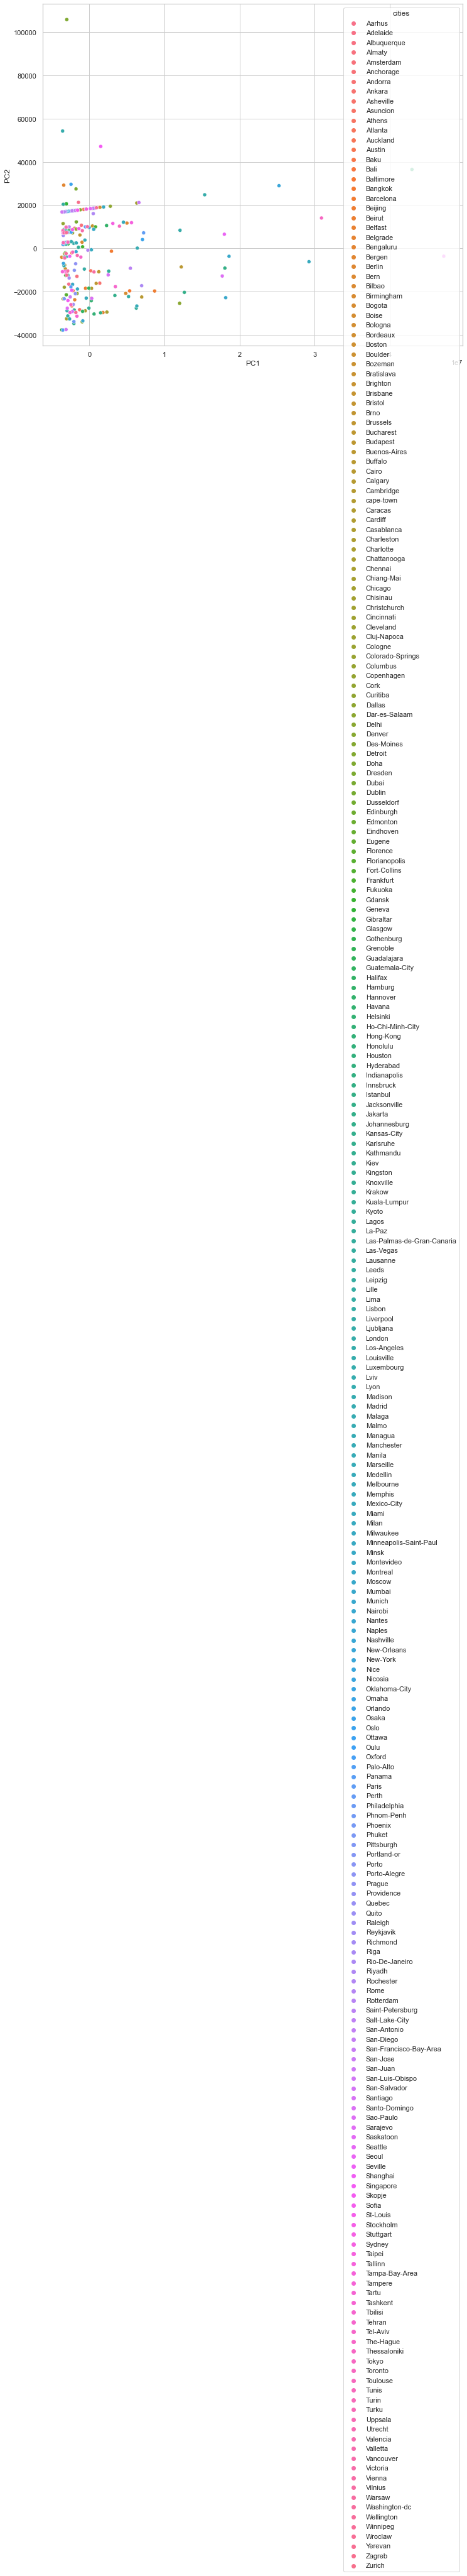

In [15]:
pca_country = sns.scatterplot(df2["PC1"],df2["PC2"], hue=df["cities"]);

In [16]:
dat_ = df.copy()
dat_.drop(columns="cities", inplace=True)
dat_.head()

,Airport_hub,Intercity_train_connectivity,Gun_related_deaths,Guns_per_residents,Pisa_ranking,Monthly_Fitness_Club_Membership,Beer,Monthly_Public_Transport,Lunch,Large_apartment,...,Small_apartment,Poblacion,Homosexuality_acceptance,VAT_Sales_Tax,Art_galleries,Concert_venues,Museums,Sport_venues,GDP_per_capita_uno,Average_Annual_percent_sunshine
0,8,0.59,1,12,13,37.0,1.70,62.0,15.0,1700,...,840,250200,93.03,0.25,51,95,18,21,44342.66,0.0
1,26,0.17,1,24,16,50.0,4.30,80.0,13.0,1500,...,1000,1708700,0.79,0.10,82,89,37,91,46433.30,12.6
2,23,0.11,16,328,24,52.0,2.90,37.0,12.0,1200,...,760,630800,93.13,0.07,127,99,35,10,54596.65,168.0
3,45,0.66,1,1,39,83.0,0.68,19.0,5.7,620,...,340,2029800,66.56,0.12,61,68,24,53,24019.95,64.0
4,237,0.68,1,4,10,49.0,2.10,100.0,18.0,2400,...,1600,2628100,97.37,0.21,284,339,187,154,47354.53,12.9


In [17]:
scaler = StandardScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(dat_), columns=dat_.columns)
df_scaler.head()

,Airport_hub,Intercity_train_connectivity,Gun_related_deaths,Guns_per_residents,Pisa_ranking,Monthly_Fitness_Club_Membership,Beer,Monthly_Public_Transport,Lunch,Large_apartment,...,Small_apartment,Poblacion,Homosexuality_acceptance,VAT_Sales_Tax,Art_galleries,Concert_venues,Museums,Sport_venues,GDP_per_capita_uno,Average_Annual_percent_sunshine
0,-1.077994,1.032781,-0.608695,-0.463086,-0.325474,-0.530695,-0.301108,0.198675,0.055898,0.492657,...,0.017270,-0.525532,1.227562,1.327470,-0.776429,-0.227349,-0.893866,-0.777508,0.418905,-0.969582
1,-0.800159,-0.506946,-0.608695,-0.233876,-0.102438,0.127145,2.871586,0.754553,-0.104597,0.205694,...,0.382900,-0.302107,-1.110510,-0.489019,-0.389168,-0.301543,-0.548770,0.282599,0.527322,-0.844737
2,-0.846465,-0.726907,1.053689,5.572782,0.492326,0.228351,1.163212,-0.573378,-0.184845,-0.224751,...,-0.165545,-0.467228,1.230097,-0.852317,0.172985,-0.177886,-0.585096,-0.944096,0.950660,0.695016
3,-0.506889,1.289402,-0.608695,-0.673196,1.607507,1.797048,-1.545780,-1.129256,-0.690403,-1.056945,...,-1.125325,-0.252919,0.556608,-0.246821,-0.651506,-0.561221,-0.784889,-0.292888,-0.634997,-0.335450
4,2.456681,1.362722,-0.608695,-0.615893,-0.548510,0.076542,0.186999,1.372195,0.296640,1.497029,...,1.754014,-0.161267,1.337571,0.843073,2.134273,2.789870,2.175671,1.236695,0.575096,-0.841765


## We performed the elbow method to determine the number of clusters to use

In [18]:
kmeans = [KMeans(n_clusters=i) for i in range(1,31)]
for model in kmeans:
    model.fit(df2)

In [19]:
inertias = [model.inertia_ for model in kmeans]
inertias[:8]

[1.116496402264743e+16,
 3442143179165053.0,
 1669129133477019.0,
 882032181608432.8,
 576675659948526.0,
 279915777851315.7,
 207944384105163.0,
 138275172589170.89]

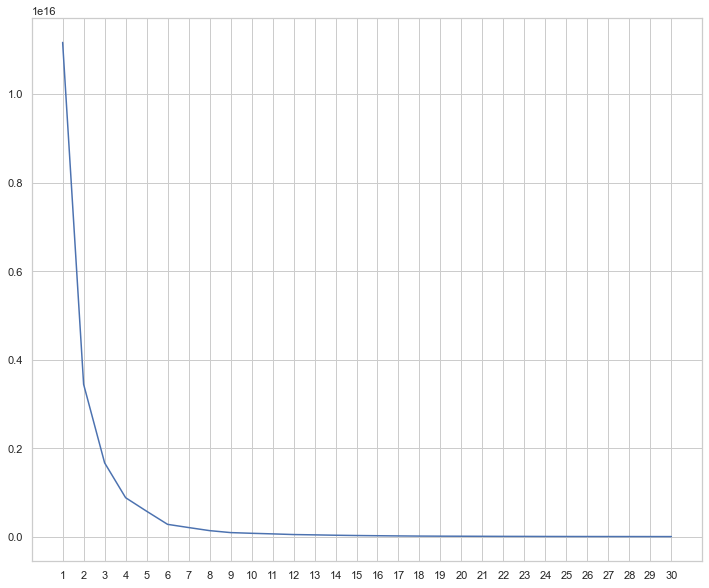

In [20]:
plt.plot(range(1,31),inertias)
plt.xticks(range(1,31));

## We train the algorithm

In [21]:
km = KMeans(n_clusters=2)
km.fit(df2)

KMeans(n_clusters=2)

In [22]:
y_pred = km.predict(df2)

In [23]:
df2["predict"] = y_pred

In [24]:
df2["real"] = original["cities"]

In [25]:
df2

,PC1,PC2,predict,real
0,-3.430642e+06,6651.270839,0,Aarhus
1,-1.972143e+06,9345.907126,0,Adelaide
2,-3.050046e+06,17037.664793,0,Albuquerque
3,-1.651034e+06,-12965.791734,0,Almaty
4,-1.052743e+06,10699.702893,0,Amsterdam
...,...,...,...,...
257,-3.048742e+06,7286.716588,0,Winnipeg
258,-3.013334e+06,-12438.131124,0,Wroclaw
259,-1.794127e+06,-29669.632906,0,Yerevan
260,-2.730632e+06,-16541.260308,0,Zagreb


In [26]:
crosstab = pd.crosstab(df2.predict, df2.real)

In [27]:
crosstab

real,Aarhus,Adelaide,Albuquerque,Almaty,Amsterdam,Anchorage,Andorra,Ankara,Asheville,Asuncion,...,Vilnius,Warsaw,Washington-dc,Wellington,Winnipeg,Wroclaw,Yerevan,Zagreb,Zurich,cape-town
predict,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## We inspect the existing correlation with our precondition

In [28]:
df['predict'] = y_pred

In [29]:
corr = df.corr()
corr

,Airport_hub,Intercity_train_connectivity,Gun_related_deaths,Guns_per_residents,Pisa_ranking,Monthly_Fitness_Club_Membership,Beer,Monthly_Public_Transport,Lunch,Large_apartment,...,Poblacion,Homosexuality_acceptance,VAT_Sales_Tax,Art_galleries,Concert_venues,Museums,Sport_venues,GDP_per_capita_uno,Average_Annual_percent_sunshine,predict
Airport_hub,1.000000,0.420830,-0.164385,-0.062502,0.069951,0.210558,0.086649,0.368408,-0.016451,0.453824,...,0.383299,-0.110082,0.119462,0.396094,0.432525,0.494449,0.456464,0.236309,-0.078547,0.302881
Intercity_train_connectivity,0.420830,1.000000,-0.397881,-0.265452,-0.175837,0.137826,-0.069219,0.171461,0.121290,0.126864,...,0.111065,-0.262619,0.297223,-0.078439,-0.037356,0.132118,0.077308,0.086884,-0.136534,0.123815
Gun_related_deaths,-0.164385,-0.397881,1.000000,0.266801,0.049916,-0.076257,-0.002499,-0.146154,-0.149052,-0.137582,...,0.014056,0.051006,-0.089742,0.142617,0.132154,-0.013296,0.043274,-0.136248,0.074162,-0.035296
Guns_per_residents,-0.062502,-0.265452,0.266801,1.000000,0.113680,-0.071150,0.257807,0.133215,-0.014230,0.261683,...,-0.131586,0.365628,-0.400691,0.282353,0.180248,0.118471,0.093398,0.437081,0.134508,-0.117257
Pisa_ranking,0.069951,-0.175837,0.049916,0.113680,1.000000,0.140632,0.024274,0.025743,-0.113080,0.021975,...,0.049178,0.043122,0.214125,0.284755,0.267296,0.229777,0.315735,0.125836,0.056095,0.094454
Monthly_Fitness_Club_Membership,0.210558,0.137826,-0.076257,-0.071150,0.140632,1.000000,0.234741,0.257785,0.014592,0.341771,...,0.217419,-0.048877,0.013026,0.071864,0.068082,0.169461,0.061046,0.212101,-0.072138,0.122781
Beer,0.086649,-0.069219,-0.002499,0.257807,0.024274,0.234741,1.000000,0.477207,0.228785,0.303729,...,0.017836,0.051545,-0.246634,0.150535,0.086155,0.067956,0.110679,0.336132,0.000374,0.009396
Monthly_Public_Transport,0.368408,0.171461,-0.146154,0.133215,0.025743,0.257785,0.477207,1.000000,-0.020258,0.451092,...,0.038659,0.020419,0.086016,0.157822,0.167138,0.154957,0.130026,0.403066,0.053699,0.032217
Lunch,-0.016451,0.121290,-0.149052,-0.014230,-0.113080,0.014592,0.228785,-0.020258,1.000000,0.048220,...,-0.158056,-0.089993,-0.115088,-0.119444,-0.162449,-0.106472,-0.141027,0.049505,-0.019673,-0.089717
Large_apartment,0.453824,0.126864,-0.137582,0.261683,0.021975,0.341771,0.303729,0.451092,0.048220,1.000000,...,0.179276,0.217828,-0.229772,0.309742,0.273994,0.322503,0.222435,0.639966,0.081934,0.128242


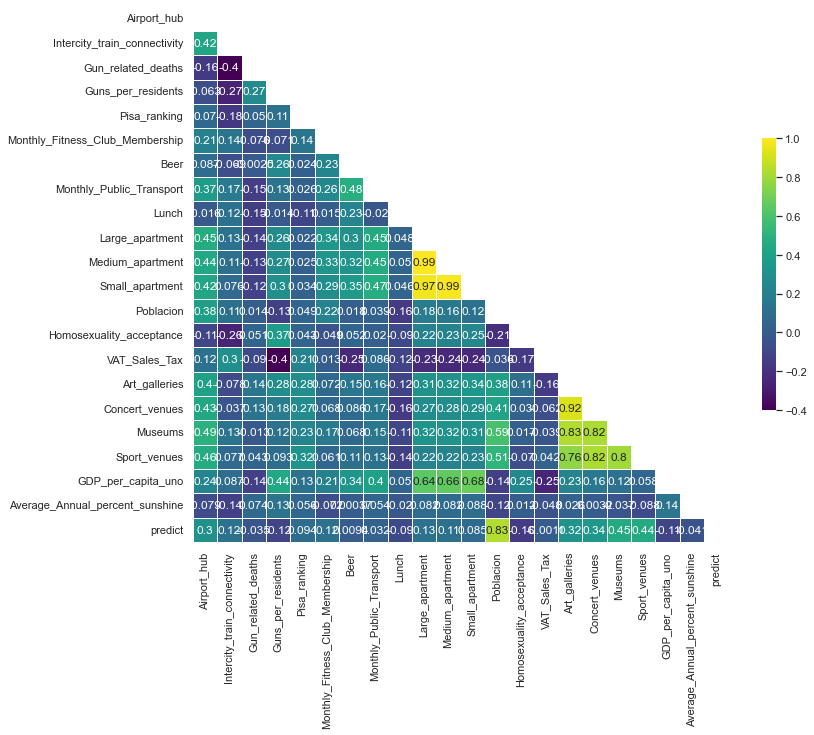

In [30]:
mascara5 = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,
            mask = mascara5,
            cmap='viridis',
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5}, #barra lateral,
            annot=True
);

### We can see that there is no strong correlation between the variables.

In [31]:
#Sacamos K-means con todos los predictores

In [33]:
km2  = KMeans(n_clusters=2)
km2.fit(df_scaler)

KMeans(n_clusters=2)

In [34]:
y_cuatro = km2.predict(df_scaler)

In [36]:
df_scaler["real"] = original.cities
df_scaler["kmeans"] = y_cuatro

In [37]:
df_scaler.head()

,Airport_hub,Intercity_train_connectivity,Gun_related_deaths,Guns_per_residents,Pisa_ranking,Monthly_Fitness_Club_Membership,Beer,Monthly_Public_Transport,Lunch,Large_apartment,...,Homosexuality_acceptance,VAT_Sales_Tax,Art_galleries,Concert_venues,Museums,Sport_venues,GDP_per_capita_uno,Average_Annual_percent_sunshine,real,kmeans
0,-1.077994,1.032781,-0.608695,-0.463086,-0.325474,-0.530695,-0.301108,0.198675,0.055898,0.492657,...,1.227562,1.327470,-0.776429,-0.227349,-0.893866,-0.777508,0.418905,-0.969582,Aarhus,0
1,-0.800159,-0.506946,-0.608695,-0.233876,-0.102438,0.127145,2.871586,0.754553,-0.104597,0.205694,...,-1.110510,-0.489019,-0.389168,-0.301543,-0.548770,0.282599,0.527322,-0.844737,Adelaide,0
2,-0.846465,-0.726907,1.053689,5.572782,0.492326,0.228351,1.163212,-0.573378,-0.184845,-0.224751,...,1.230097,-0.852317,0.172985,-0.177886,-0.585096,-0.944096,0.950660,0.695016,Albuquerque,0
3,-0.506889,1.289402,-0.608695,-0.673196,1.607507,1.797048,-1.545780,-1.129256,-0.690403,-1.056945,...,0.556608,-0.246821,-0.651506,-0.561221,-0.784889,-0.292888,-0.634997,-0.335450,Almaty,0
4,2.456681,1.362722,-0.608695,-0.615893,-0.548510,0.076542,0.186999,1.372195,0.296640,1.497029,...,1.337571,0.843073,2.134273,2.789870,2.175671,1.236695,0.575096,-0.841765,Amsterdam,1


In [38]:
cross2 = pd.crosstab(df_scaler.kmeans, df_scaler.real)
cross2

real,Aarhus,Adelaide,Albuquerque,Almaty,Amsterdam,Anchorage,Andorra,Ankara,Asheville,Asuncion,...,Vilnius,Warsaw,Washington-dc,Wellington,Winnipeg,Wroclaw,Yerevan,Zagreb,Zurich,cape-town
kmeans,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,0,1,1,1,1,1,...,1,1,0,1,1,1,1,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


/usr/local/Caskroom/miniconda/base/envs/ironhack2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/ironhack2/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


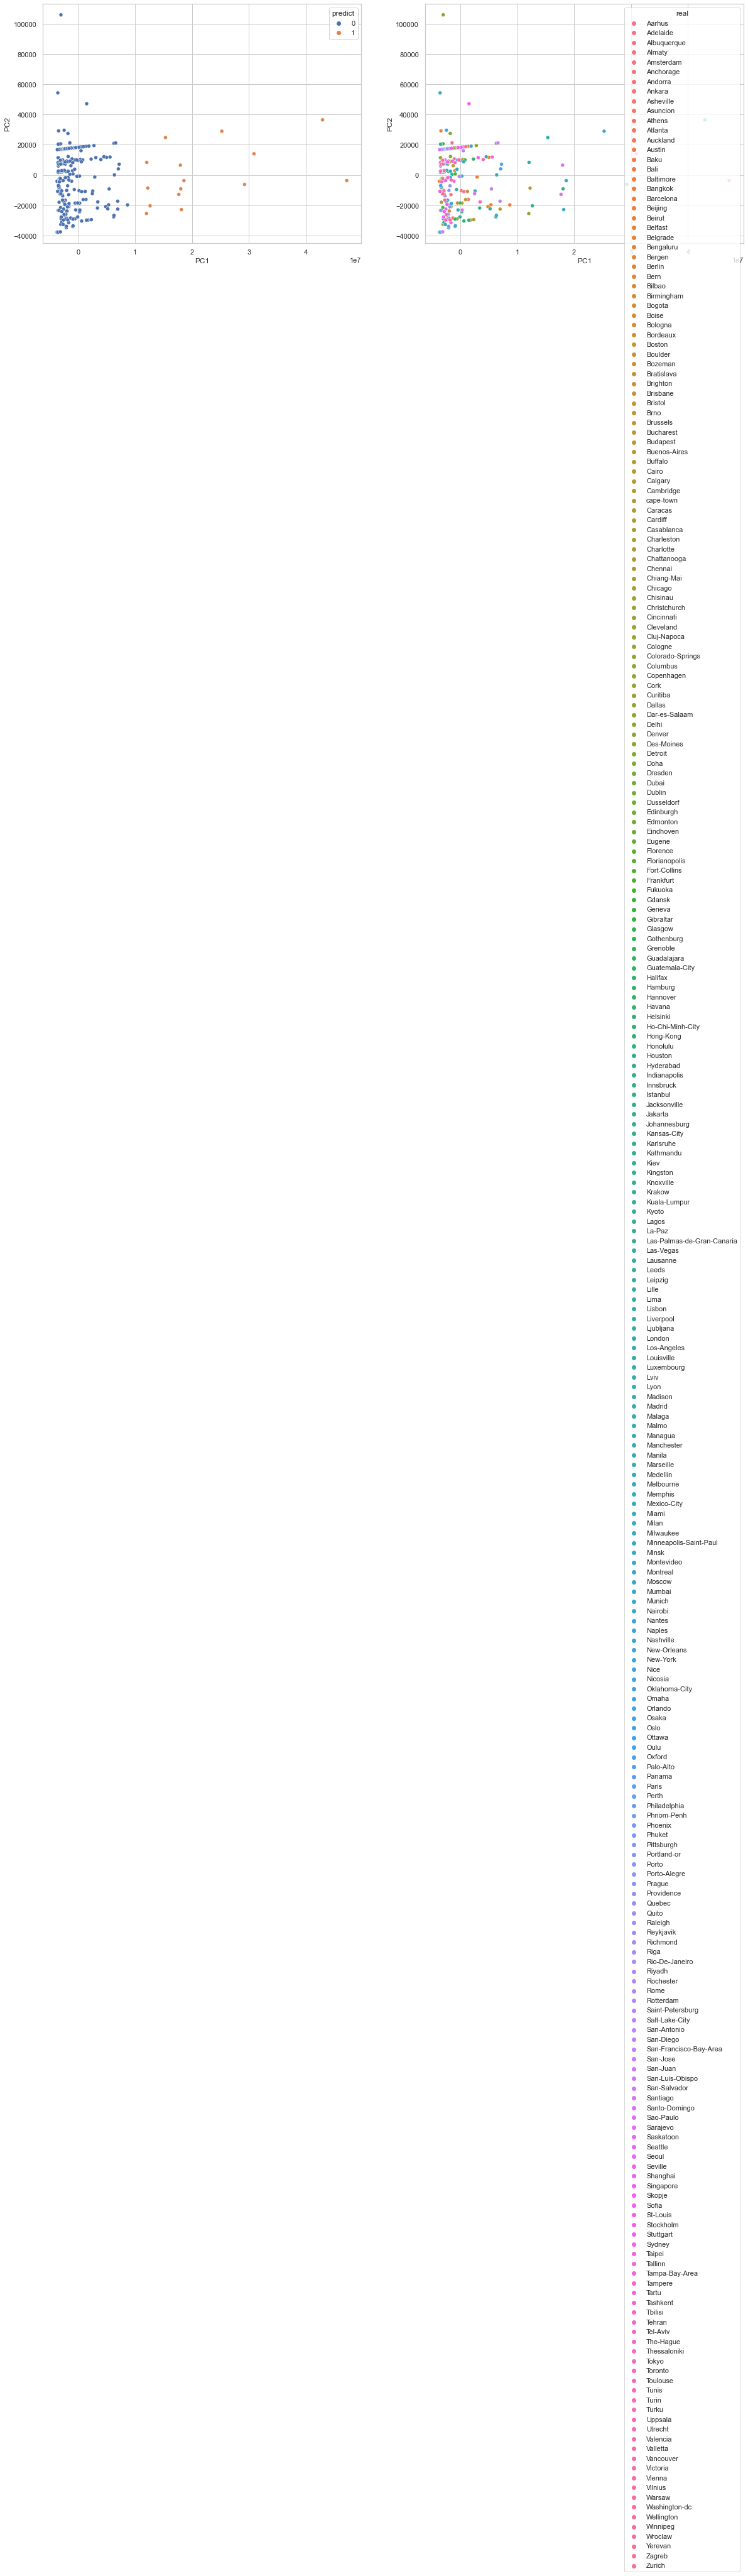

In [39]:
fig, axs = plt.subplots(1,2, figsize=(20,7))
pca_ = sns.scatterplot(df2["PC1"],df2["PC2"], hue=df2["predict"], ax=axs[0]);
pca_ = sns.scatterplot(df2["PC1"],df2["PC2"], hue=df2["real"], ax=axs[1]);

In [40]:
df2.head()

,PC1,PC2,predict,real
0,-3.430642e+06,6651.270839,0,Aarhus
1,-1.972143e+06,9345.907126,0,Adelaide
2,-3.050046e+06,17037.664793,0,Albuquerque
3,-1.651034e+06,-12965.791734,0,Almaty
4,-1.052743e+06,10699.702893,0,Amsterdam


In [58]:
df.head()

,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,predict
0,Europe,6.1315,4.015,2.8270,2.512,3.5360,6.31175,9.940000,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,9.7385,4.1300,2
1,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,7.8220,5.5310,2
2,North America,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,7.0285,3.5155,5
3,Asia,9.2820,9.333,2.4585,0.000,4.5920,5.87125,5.568000,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,6.5395,5.5000,1
4,Europe,3.0530,3.824,7.9715,6.107,8.3245,6.11850,8.836667,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,8.3680,5.3070,0


## Observemos con profundidad cada una de nuestras columnas, en relación a cada cluster

### Housing

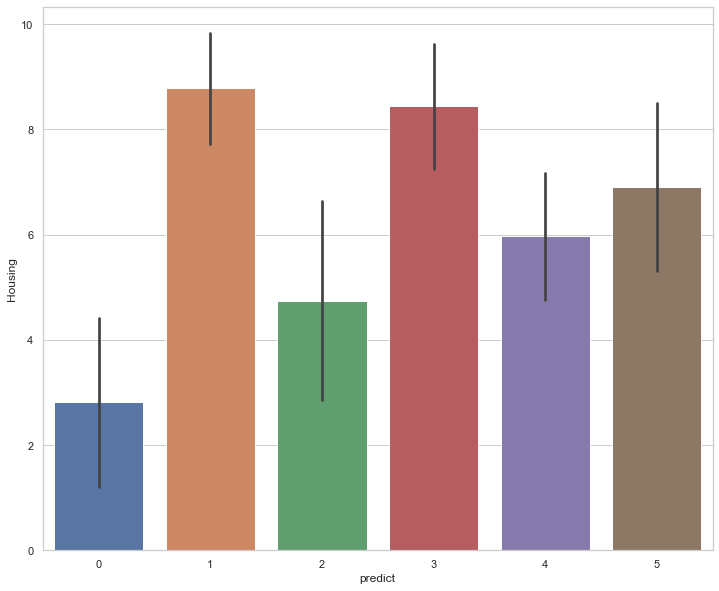

In [130]:
barplot = sns.barplot(x="predict", y="Housing", data=df,ci="sd")

### Cost of Living

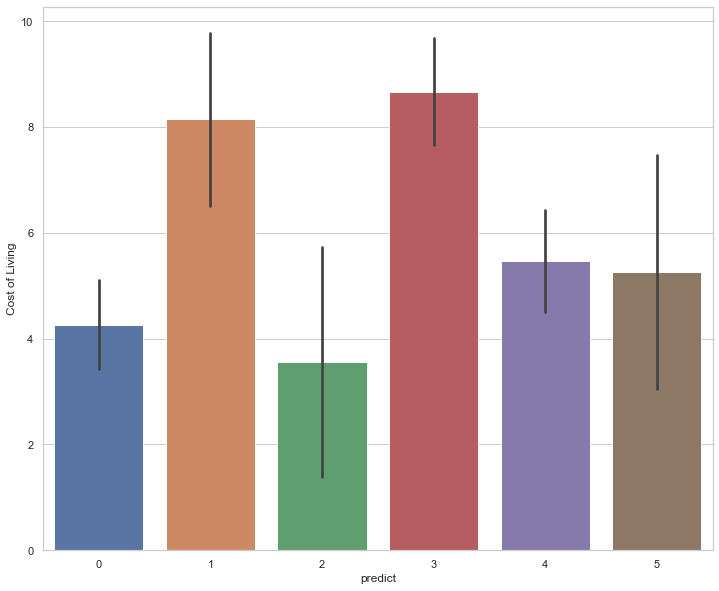

In [132]:
barplot = sns.barplot(x="predict", y="Cost of Living", data=df,ci="sd")

### Travel Connectivity

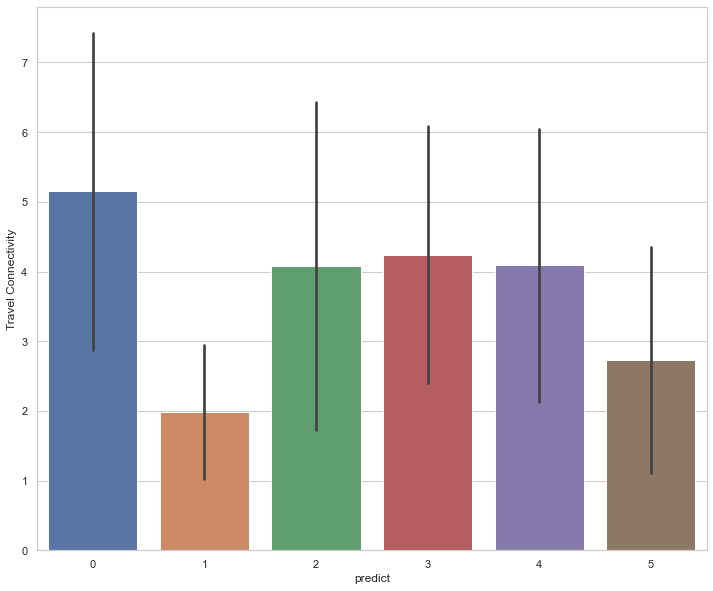

In [128]:
barplot = sns.barplot(x="predict", y="Travel Connectivity", data=df,ci="sd")

### Safety

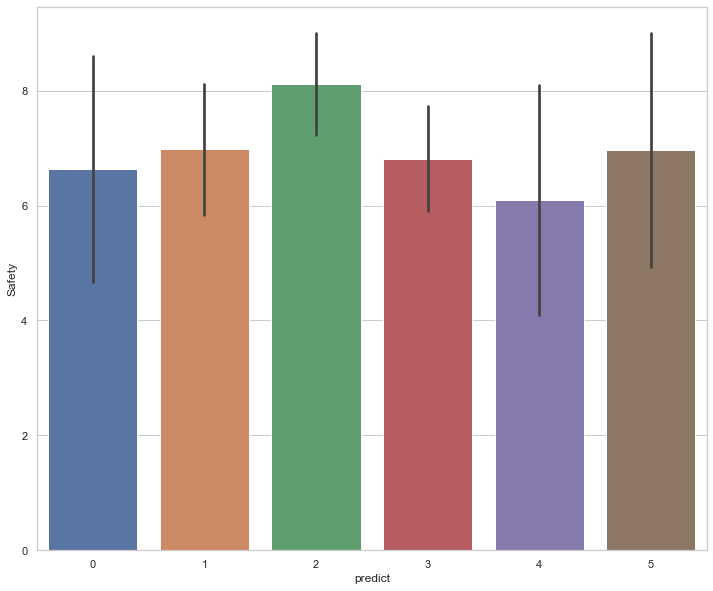

In [129]:
barplot = sns.barplot(x="predict", y="Safety", data=df,ci="sd")

### Healthcare

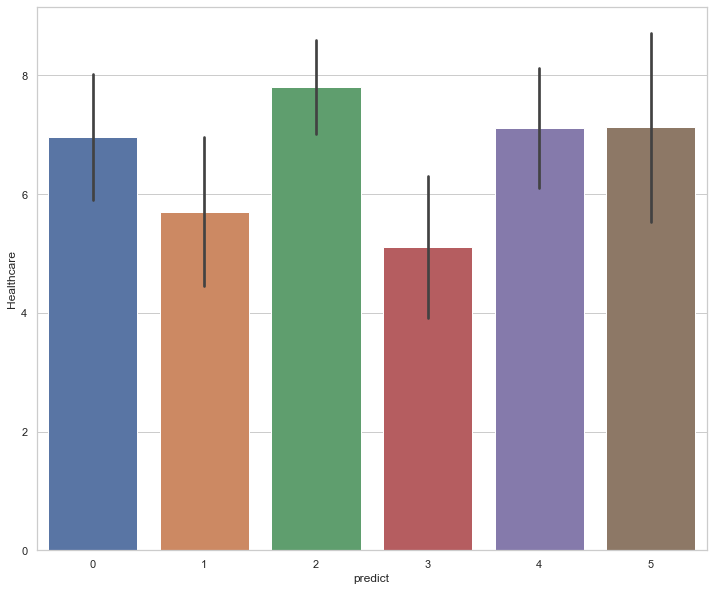

In [133]:
barplot = sns.barplot(x="predict", y="Healthcare", data=df,ci="sd")

### Education

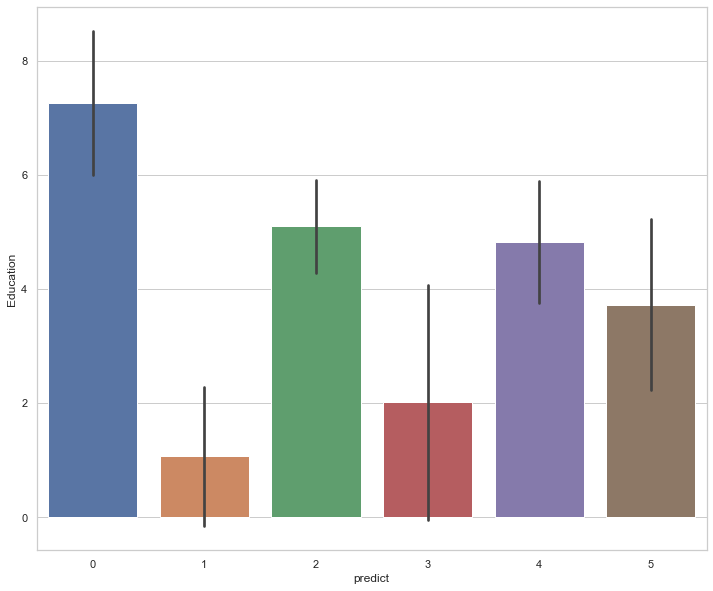

In [134]:
barplot = sns.barplot(x="predict", y="Education", data=df,ci="sd")

### Environmental Quality

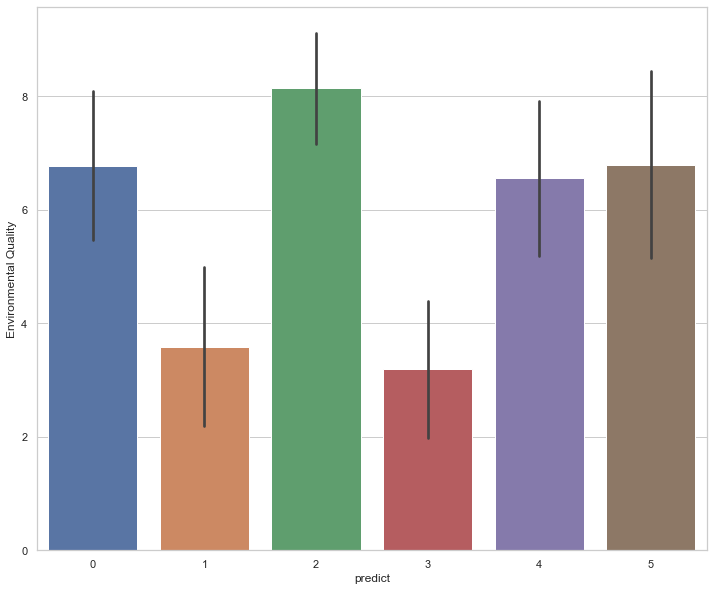

In [135]:
barplot = sns.barplot(x="predict", y="Environmental Quality", data=df,ci="sd")

### Economy

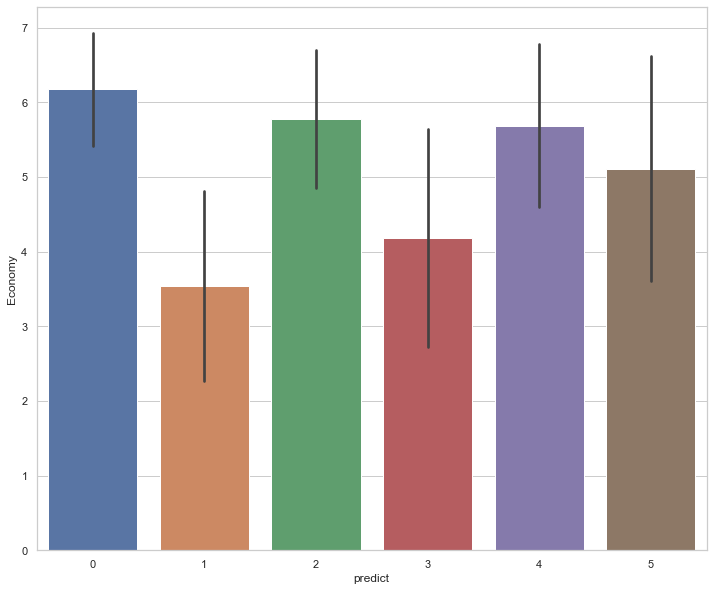

In [137]:
barplot = sns.barplot(x="predict", y="Economy", data=df,ci="sd")

### Internet Access

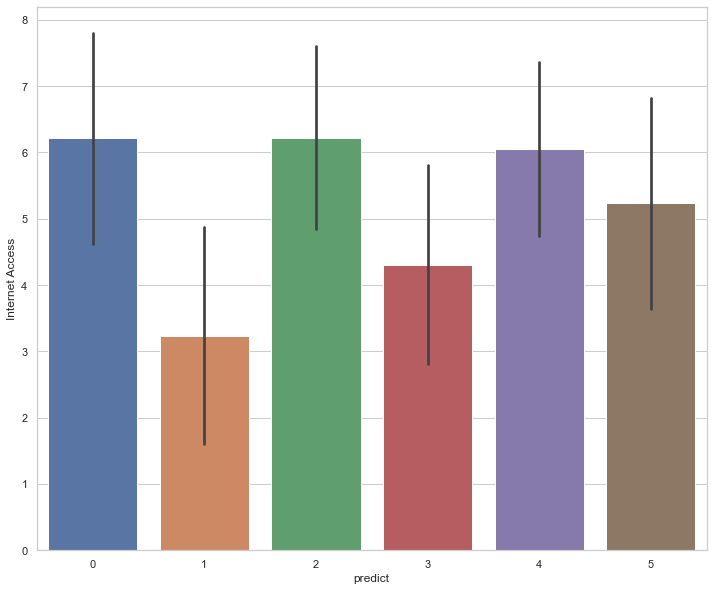

In [141]:
barplot = sns.barplot(x="predict", y="Internet Access", data=df,ci="sd")

### Leisure & Culture

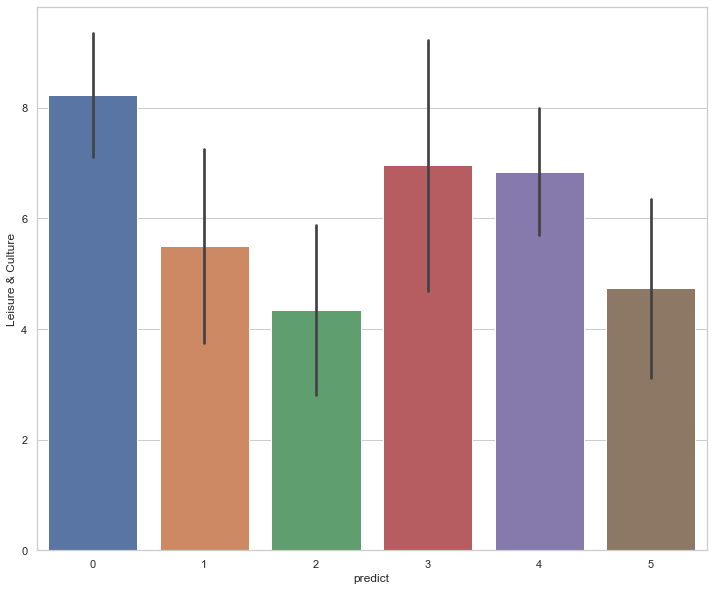

In [140]:
barplot = sns.barplot(x="predict", y="Leisure & Culture", data=df,ci="sd")

### Tolerance

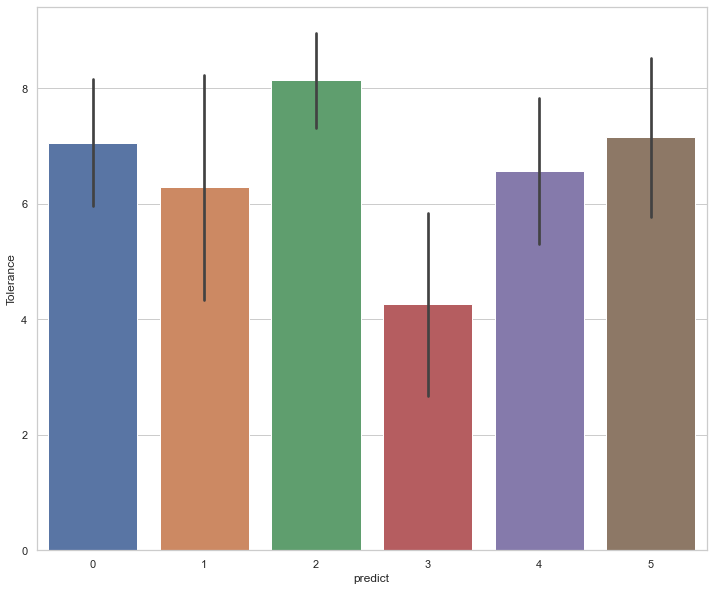

In [138]:
barplot = sns.barplot(x="predict", y="Tolerance", data=df,ci="sd")

### Outdoors

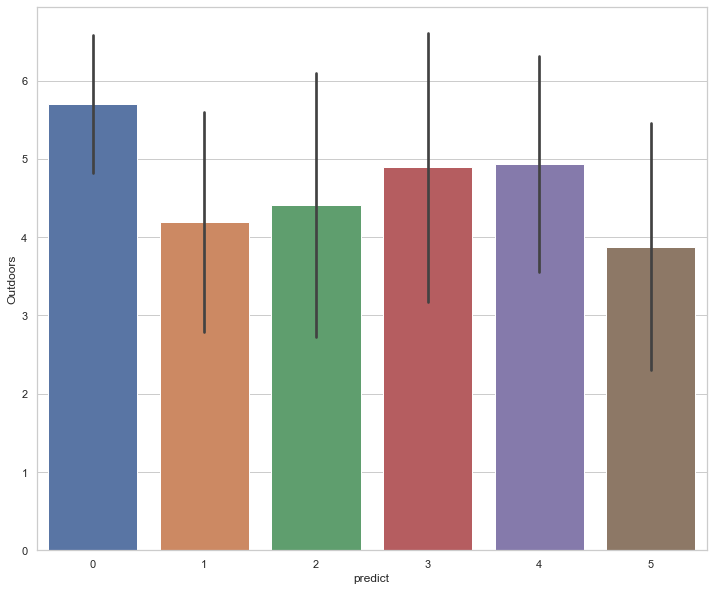

In [139]:
barplot = sns.barplot(x="predict", y="Outdoors", data=df,ci="sd")

### Creamos subdatadrames para ver cada uno de nuestros clusters por separado

In [111]:
subdata1 = df[df["predict"] == 0]

In [112]:
subdata2 = df[df["predict"] == 1]

In [113]:
subdata3 = df[df["predict"] == 2]

In [114]:
subdata4 = df[df["predict"] == 3]

In [115]:
subdata5 = df[df["predict"] == 4]

In [116]:
subdata6 = df[df["predict"] == 5]

### Observemos a continuación cada columna en los diversos clusters

## Housing

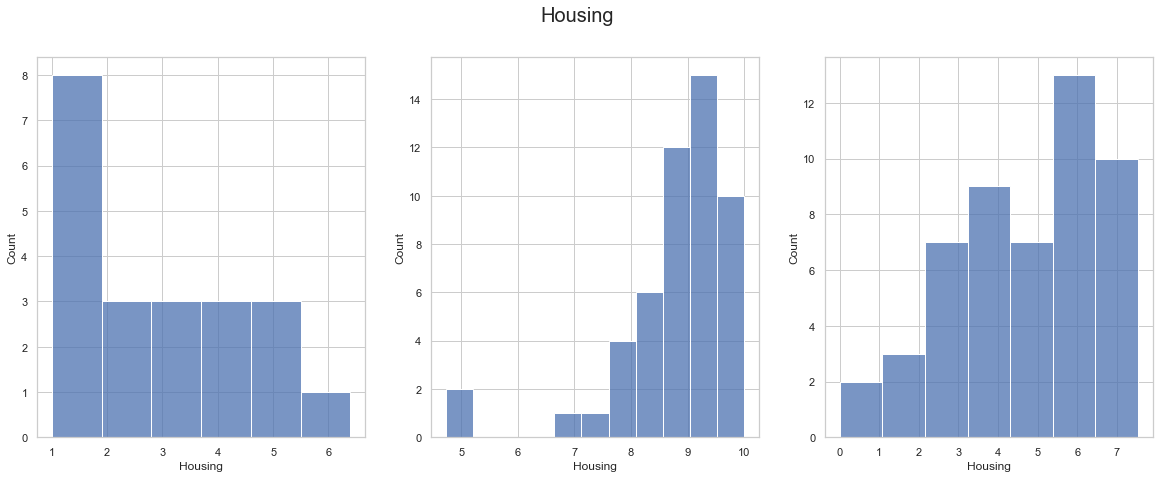

In [117]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Housing', ax=axs[0])
sns.histplot(data = subdata2, x='Housing', ax=axs[1])
sns.histplot(data = subdata3, x='Housing', ax=axs[2])
fig.suptitle('Housing', fontsize = 20);

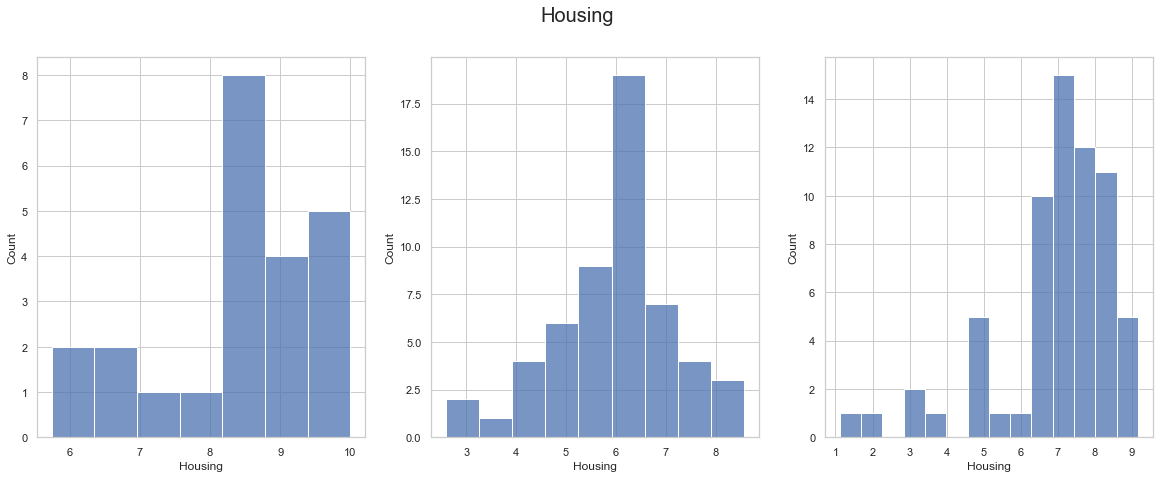

In [118]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata4, x='Housing', ax=axs[0])
sns.histplot(data = subdata5, x='Housing', ax=axs[1])
sns.histplot(data = subdata6, x='Housing', ax=axs[2])
fig.suptitle('Housing', fontsize = 20);

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

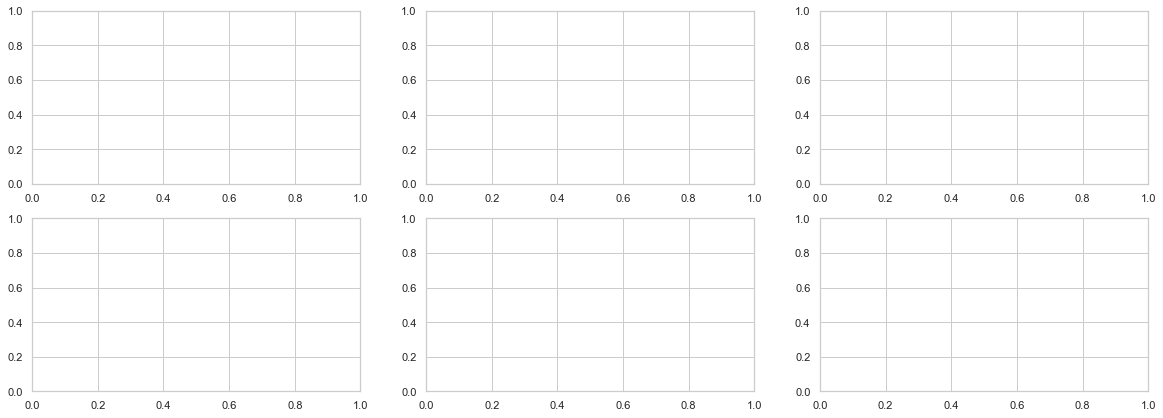

In [96]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Housing', ax=axs[0])
sns.histplot(data = subdata2, x='Housing', ax=axs[1])
sns.histplot(data = subdata3, x='Housing', ax=axs[2])
sns.histplot(data = subdata4, x='Housing', ax=axs[0])
sns.histplot(data = subdata5, x='Housing', ax=axs[1])
sns.histplot(data = subdata6, x='Housing', ax=axs[2])

## Cost of Living

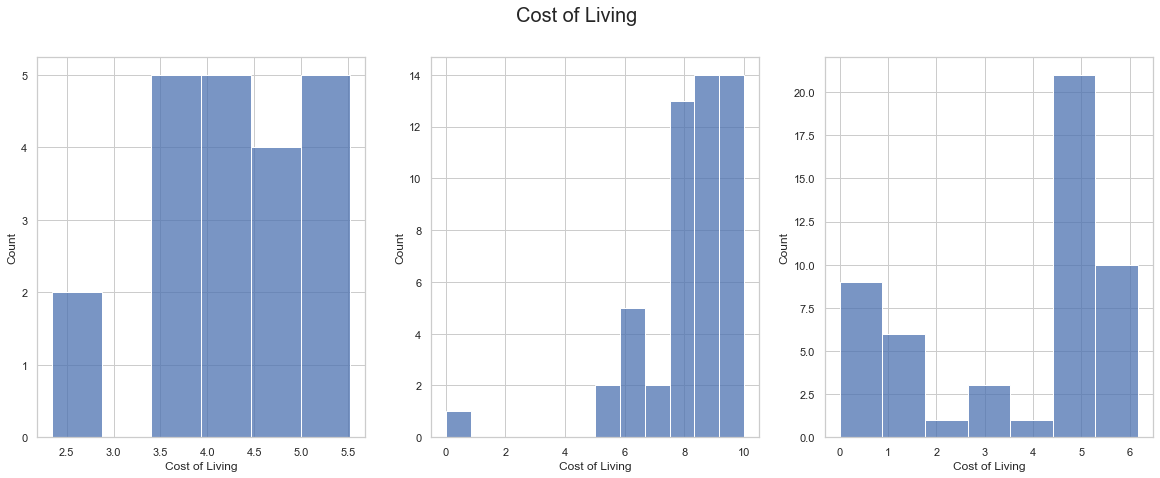

In [119]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Cost of Living', ax=axs[0])
sns.histplot(data = subdata2, x='Cost of Living', ax=axs[1])
sns.histplot(data = subdata3, x='Cost of Living', ax=axs[2])
fig.suptitle('Cost of Living', fontsize = 20);

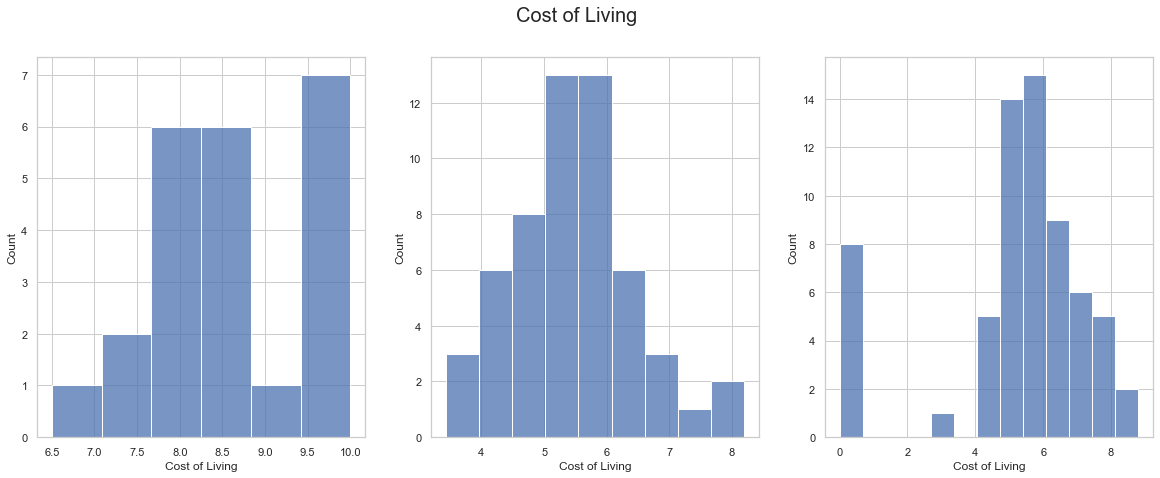

In [120]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata4, x='Cost of Living', ax=axs[0])
sns.histplot(data = subdata5, x='Cost of Living', ax=axs[1])
sns.histplot(data = subdata6, x='Cost of Living', ax=axs[2])
fig.suptitle('Cost of Living', fontsize = 20);

## Travel Connectivity

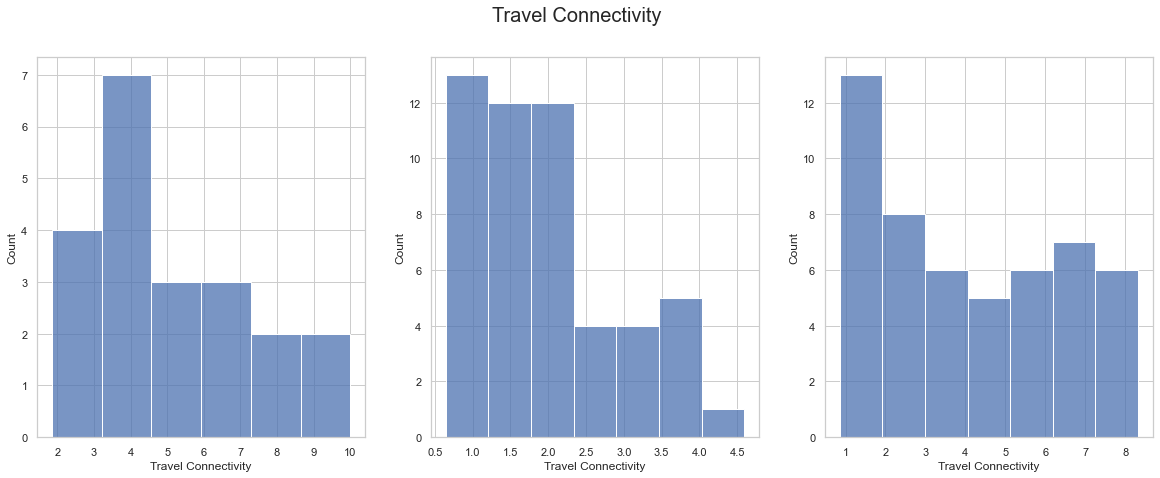

In [122]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Travel Connectivity', ax=axs[0])
sns.histplot(data = subdata2, x='Travel Connectivity', ax=axs[1])
sns.histplot(data = subdata3, x='Travel Connectivity', ax=axs[2])
fig.suptitle('Travel Connectivity', fontsize = 20);

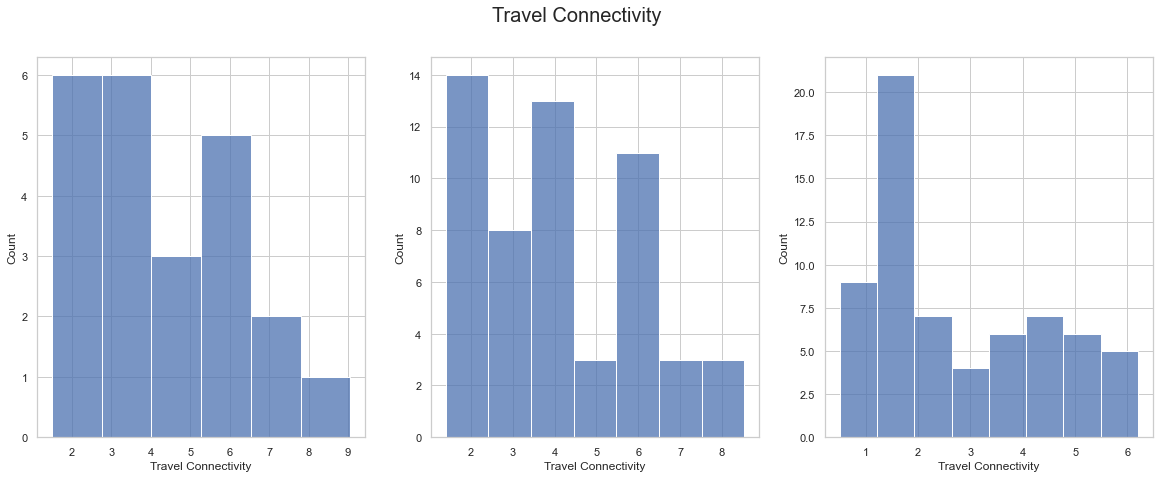

In [123]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata4, x='Travel Connectivity', ax=axs[0])
sns.histplot(data = subdata5, x='Travel Connectivity', ax=axs[1])
sns.histplot(data = subdata6, x='Travel Connectivity', ax=axs[2])
fig.suptitle('Travel Connectivity', fontsize = 20);

## Safety

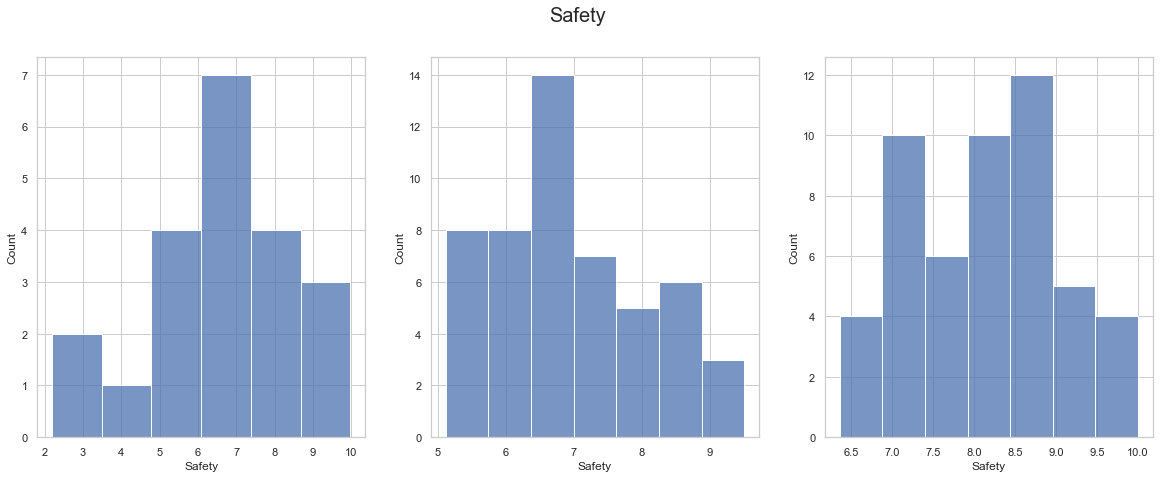

In [124]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata1, x='Safety', ax=axs[0])
sns.histplot(data = subdata2, x='Safety', ax=axs[1])
sns.histplot(data = subdata3, x='Safety', ax=axs[2])
fig.suptitle('Safety', fontsize = 20);

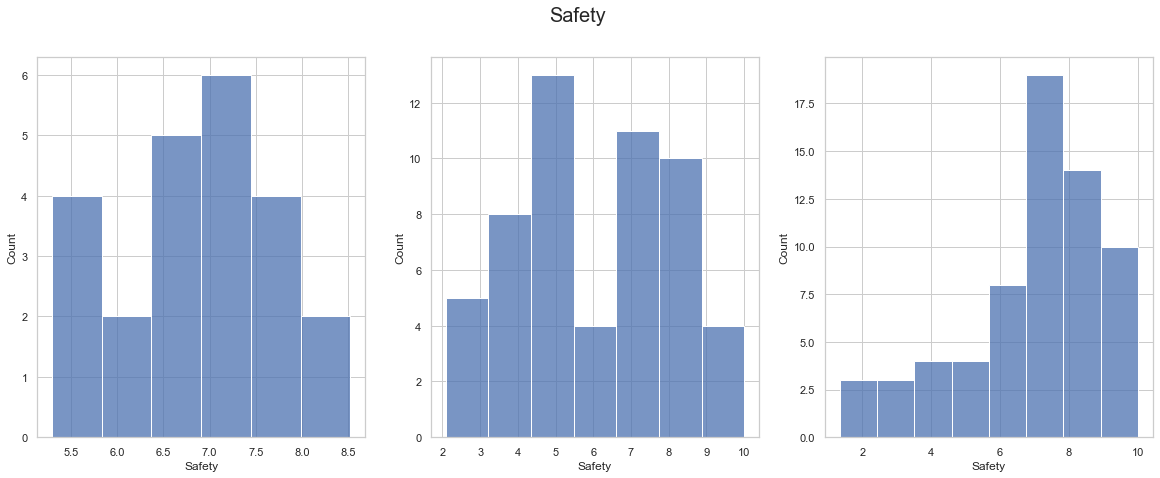

In [125]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
sns.histplot(data = subdata4, x='Safety', ax=axs[0])
sns.histplot(data = subdata5, x='Safety', ax=axs[1])
sns.histplot(data = subdata6, x='Safety', ax=axs[2])
fig.suptitle('Safety', fontsize = 20);